# Resilient Tube

In [1]:
from igraph import *
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy.spatial.distance import cdist

In [2]:
# Read local file and create edge list in tuple format 
df1 = pd.read_csv("Data/InputData_Edges.csv")
dfedge = df1[['From (RODS name)', 'To (RODS name)', 'Name']]
tuples = [tuple(x) for x in dfedge.values]

In [3]:
# Create graph based on edge list from previous step
ptn = Graph.TupleList(tuples, directed=True, vertex_name_attr="name", edge_attrs="line")
ptn["name"] = "PTN London Underground"
ptn.summary()

'IGRAPH DN-- 268 731 -- PTN London Underground\n+ attr: name (g), name (v), line (e)'

In [4]:
# Add attributes to nodes: Betweenness, NCL code, flood risk and coordinates

df2 = pd.read_csv("Data/InputData_Stations.csv")
attributes = np.asarray(df2[['Name (RODS)','NLC','FloodRisk1000a','Lat','Long']])
for station in attributes:
    try:
        vs = ptn.vs.find(name=station[0])
        vs['BetweenCent'] = ptn.betweenness(vs, directed=True)
        vs['NCL'] = station[1]
        vs['FloodRisk1000a'] = station[2]
        vs['coords'] = list(station[3:5])
    except ValueError:
        print(station[0], ' - not found!')

list(ptn.vs)

[igraph.Vertex(<igraph.Graph object at 0x113cfc408>, 0, {'BetweenCent': 0.0, 'FloodRisk1000a': 0.1364, 'name': 'Harrow & Wealdstone', 'NCL': 597, 'coords': [51.5925, -0.3351]}),
 igraph.Vertex(<igraph.Graph object at 0x113cfc408>, 1, {'BetweenCent': 532.0, 'FloodRisk1000a': 0.1935, 'name': 'Kenton', 'NCL': 620, 'coords': [51.5816, -0.3162]}),
 igraph.Vertex(<igraph.Graph object at 0x113cfc408>, 2, {'BetweenCent': 1060.0, 'FloodRisk1000a': 0.4833, 'name': 'South Kenton', 'NCL': 709, 'coords': [51.5701, -0.3081]}),
 igraph.Vertex(<igraph.Graph object at 0x113cfc408>, 3, {'BetweenCent': 1584.0, 'FloodRisk1000a': 0.2384, 'name': 'North Wembley', 'NCL': 659, 'coords': [51.5621, -0.3034]}),
 igraph.Vertex(<igraph.Graph object at 0x113cfc408>, 4, {'BetweenCent': 2104.0, 'FloodRisk1000a': 0.0472, 'name': 'Wembley Central', 'NCL': 751, 'coords': [51.5519, -0.2963]}),
 igraph.Vertex(<igraph.Graph object at 0x113cfc408>, 5, {'BetweenCent': 2620.0, 'FloodRisk1000a': 0.2317, 'name': 'Stonebridge Pa

In [5]:
# Create a plot function
def plot_hist(tup, target):
    sns.set(context="notebook", font_scale=1.2)
    plt.figure(facecolor="white", figsize=(9, 6), dpi=300)
    plt.xlabel('Path Length')
    plt.ylabel('Frequency')
    plt.title('Station: %s' % str(target))
    plt.bar(*zip(*tup))

**Delete nodes based on Flood Risk**

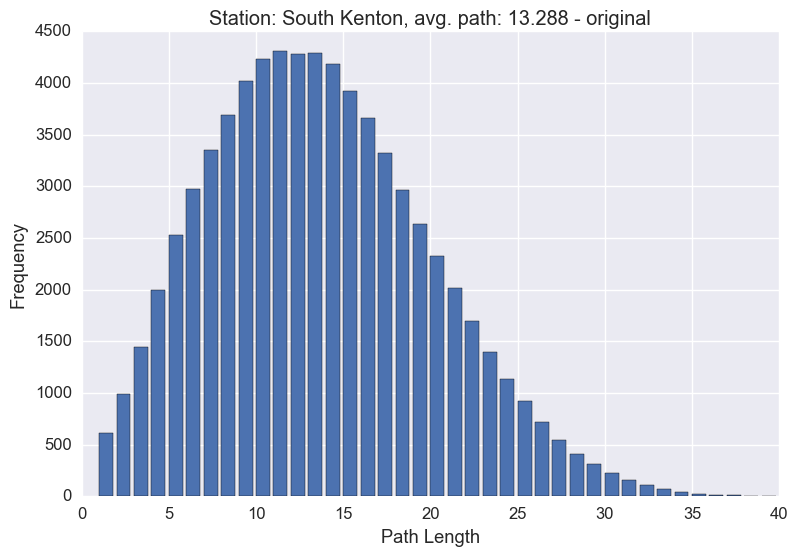

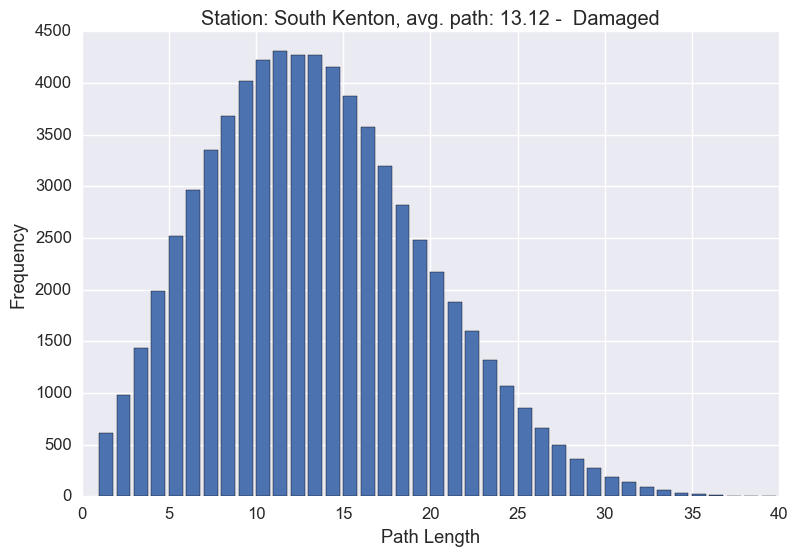

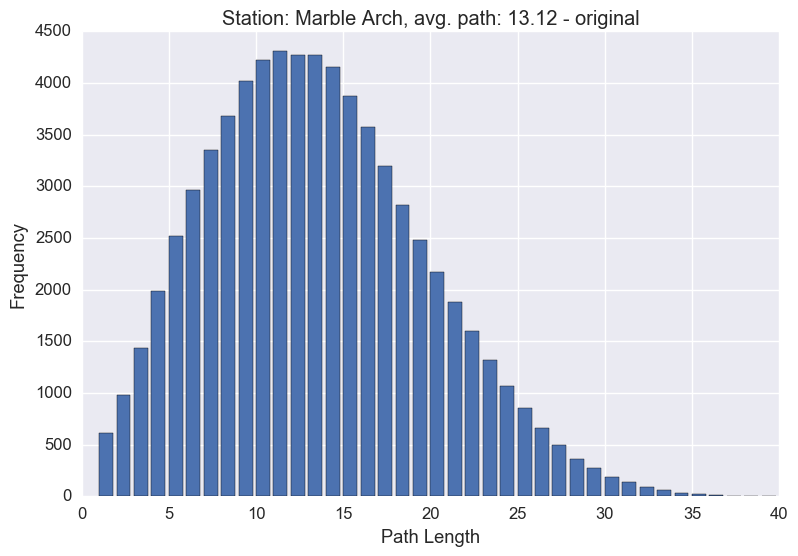

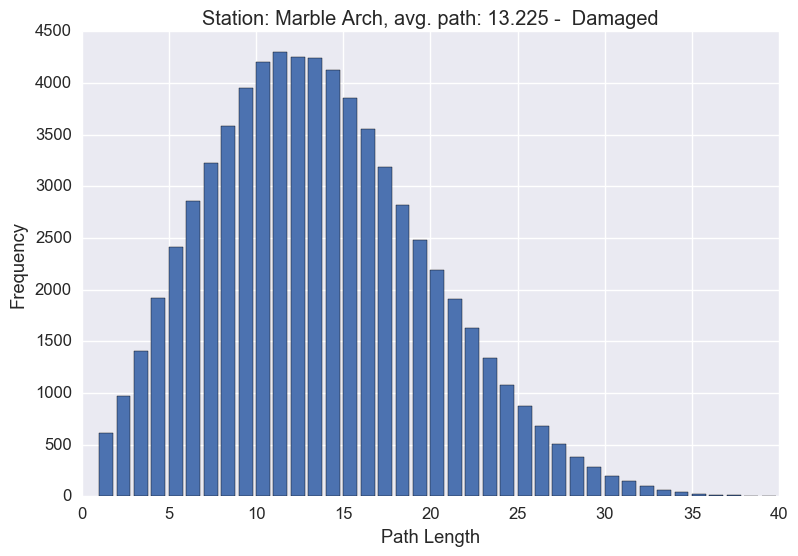

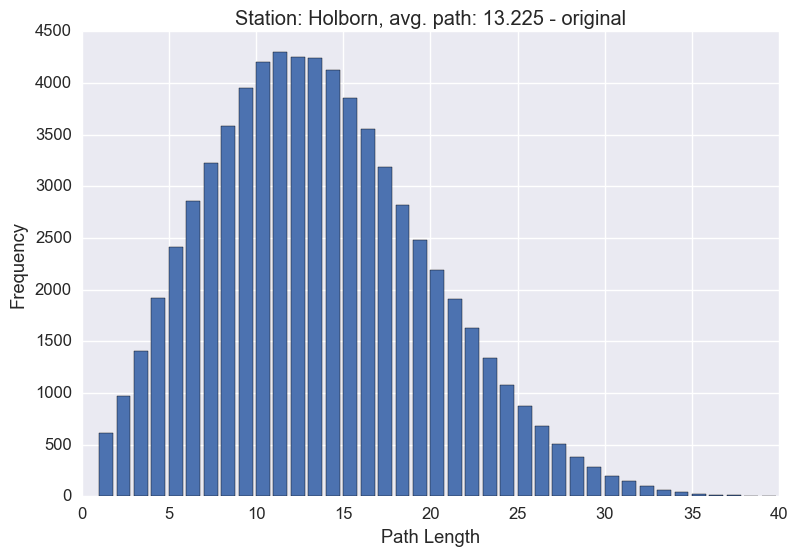

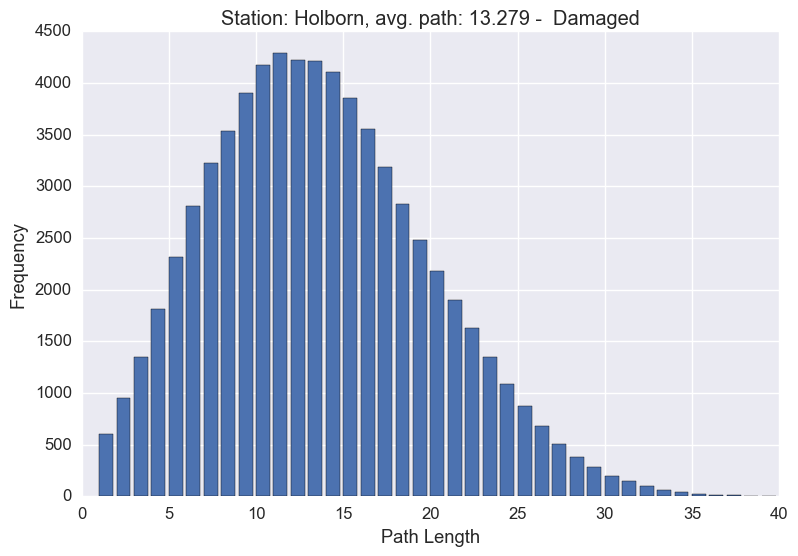

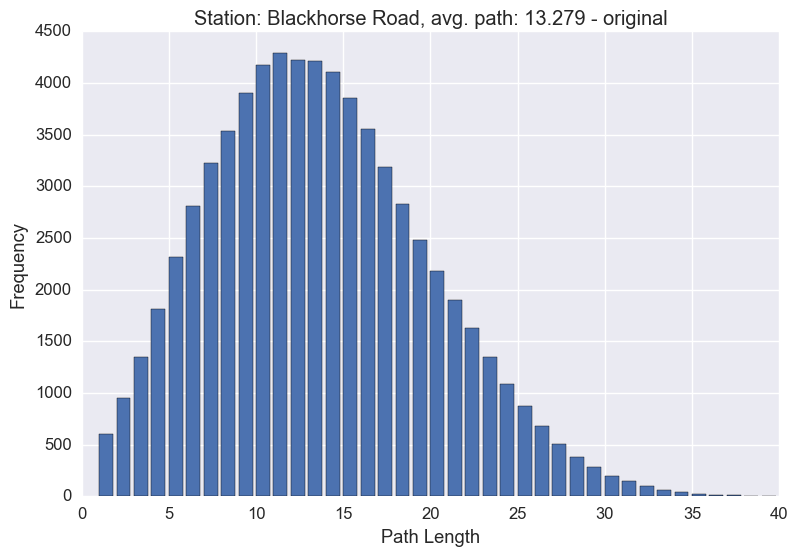

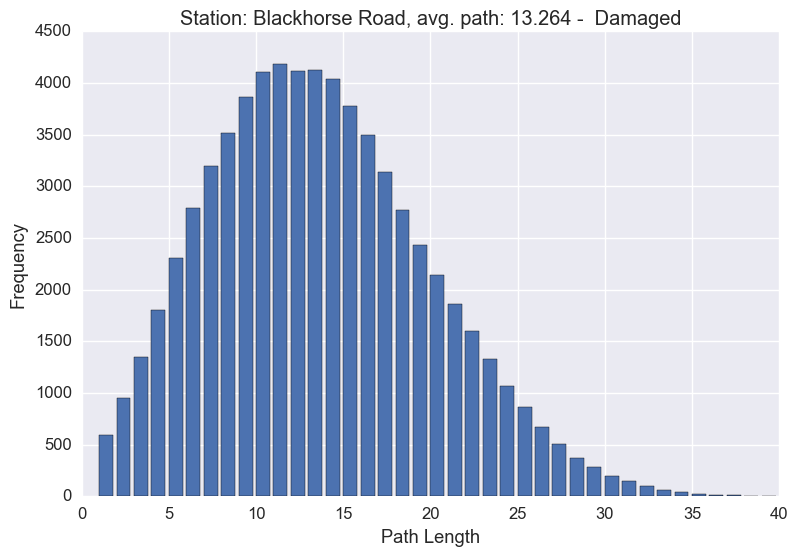

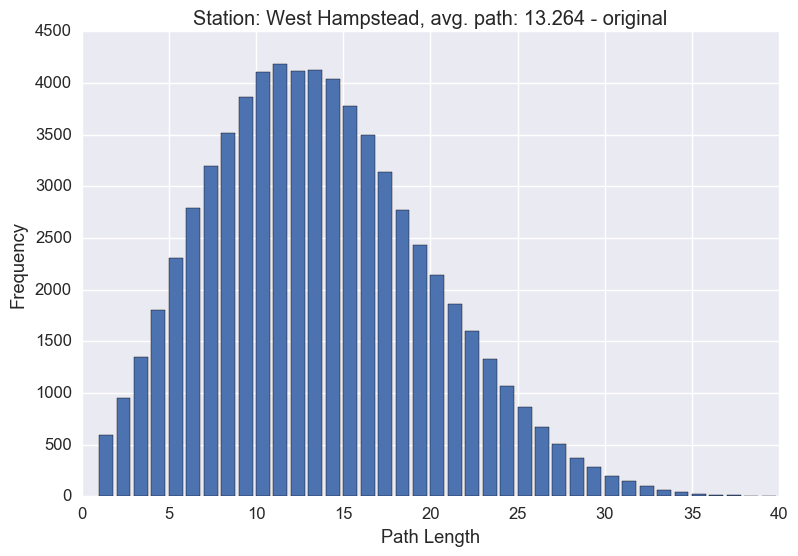

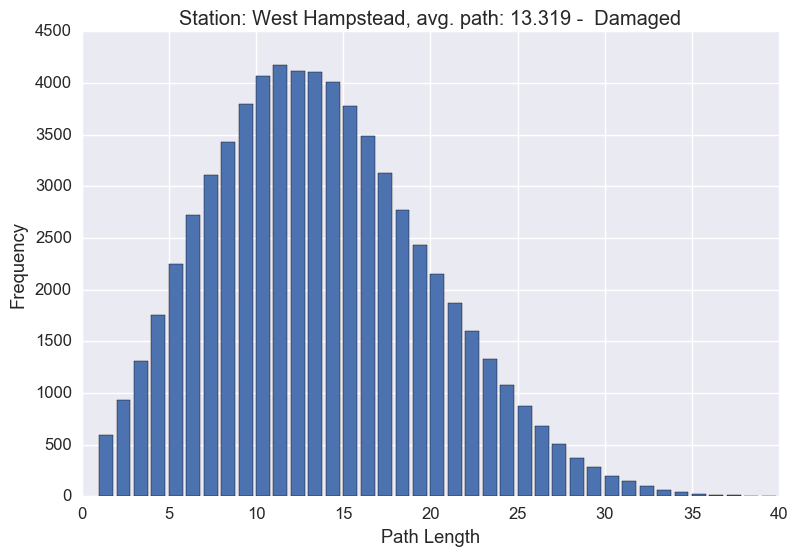

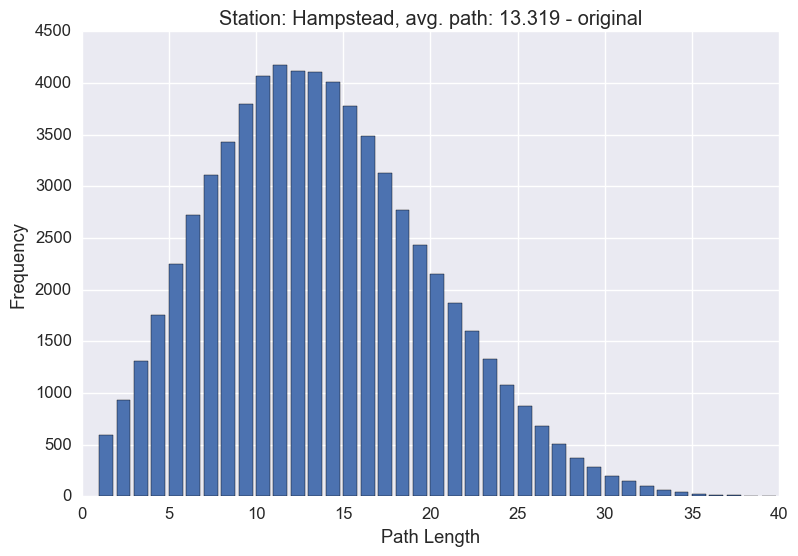

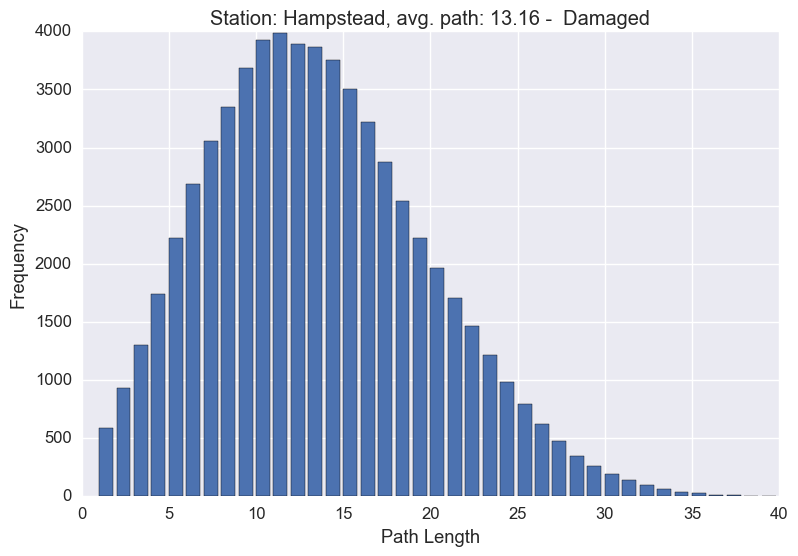

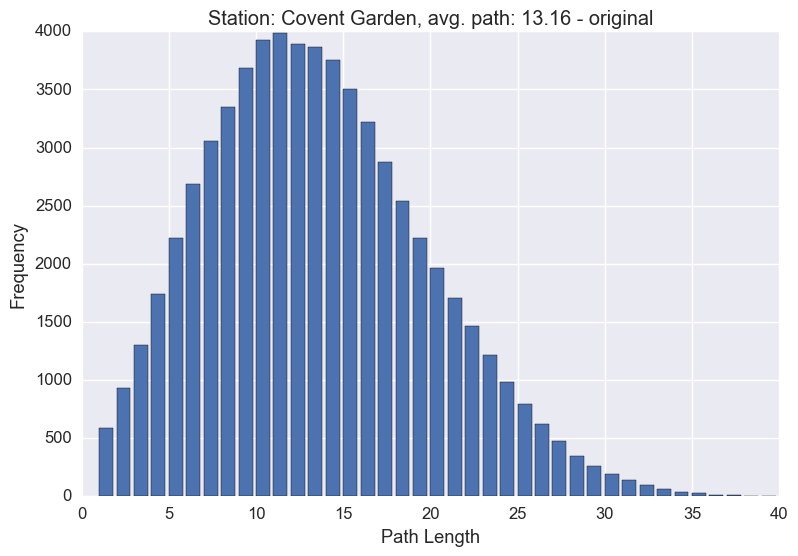

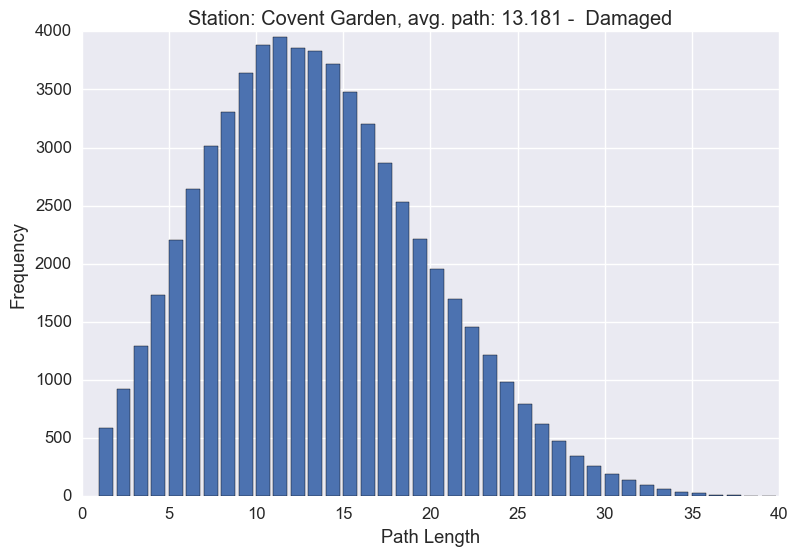

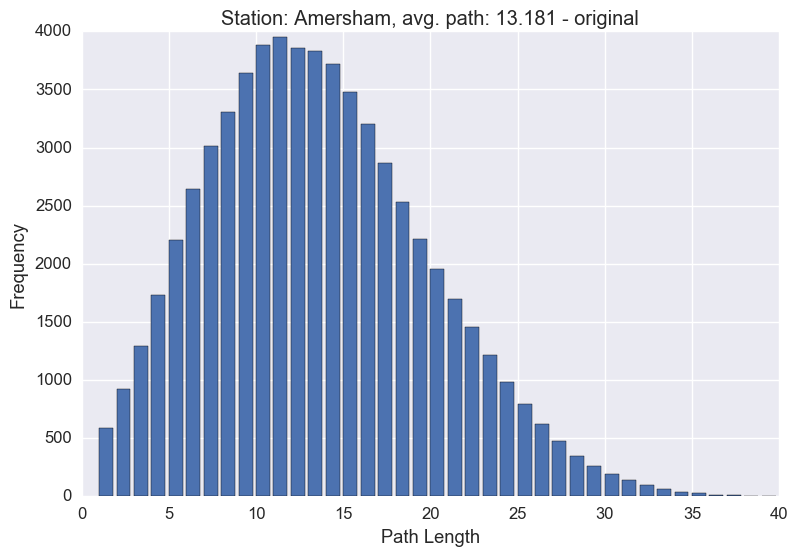

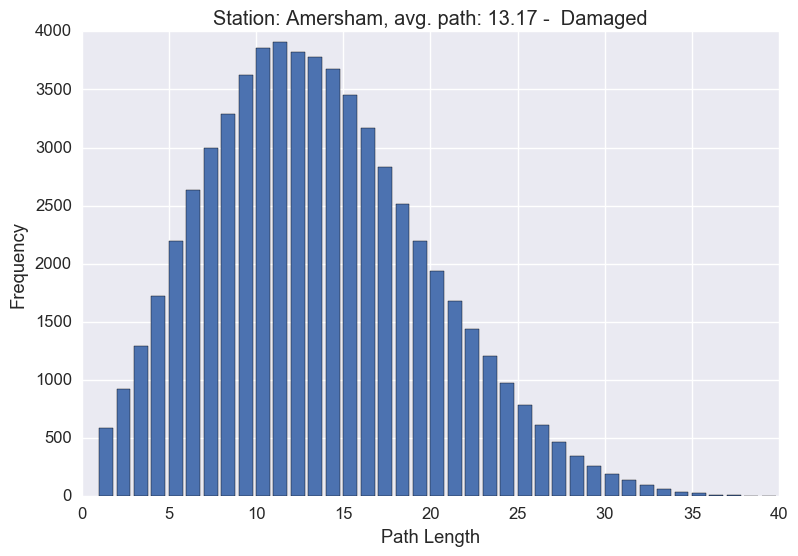

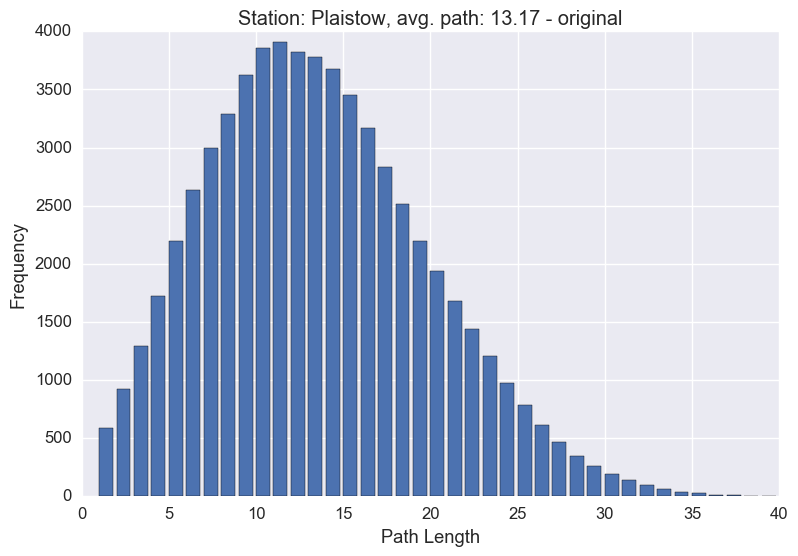

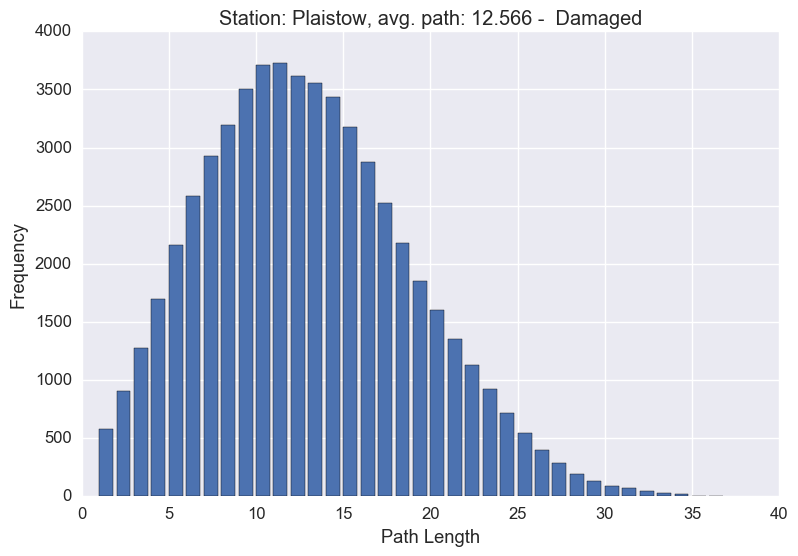

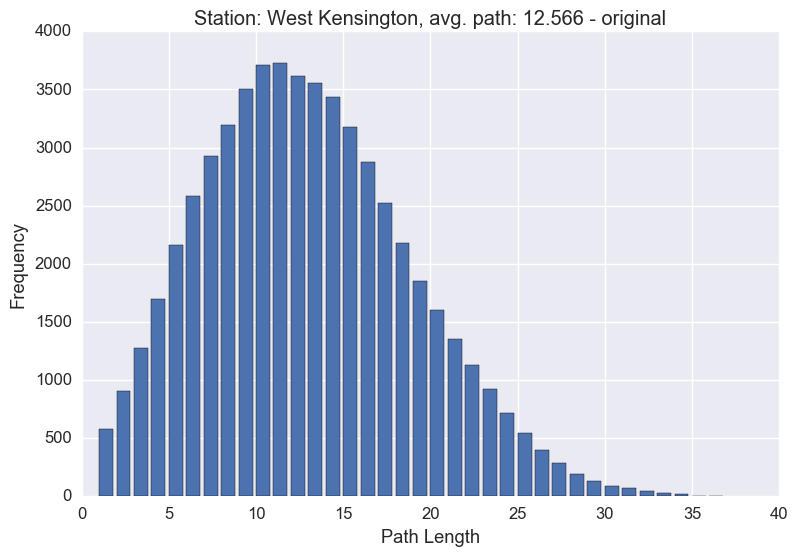

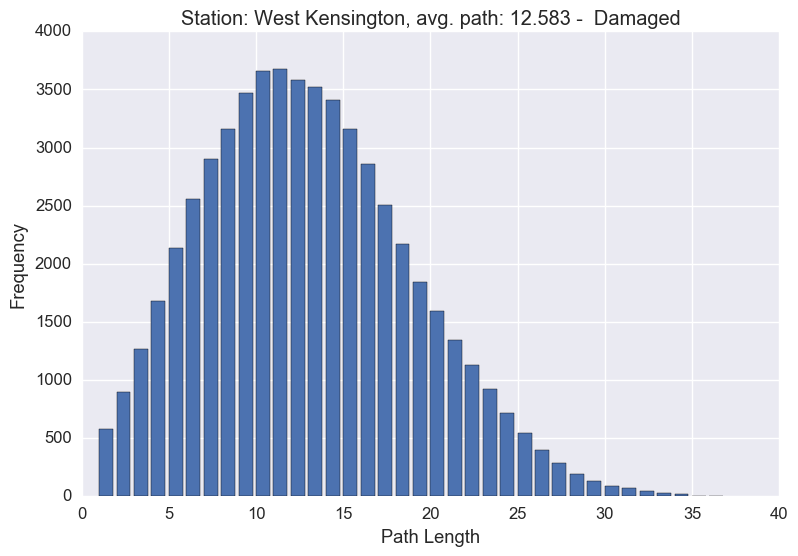

In [6]:
% matplotlib inline

# Create distance matrix (cityblock) using stations coordinates as input
dist_matrix = cdist(attributes[:,3:5], attributes[:,3:5], 'cityblock')

# Select stations with floodrisk greater than 0.3
targets = list(ptn.vs.select(FloodRisk1000a_gt= 0.3))

for node in targets:
    desc = node['name']
    path_hist_orig = list(ptn.path_length_hist(directed=True).bins())
    avg_path_orig = round(ptn.average_path_length(directed=True), 3)
    hist_orig = []
    for bin1 in path_hist_orig:
        x1 = bin1[0]
        y1 = bin1[2]
        hist_orig.append((x1,y1))
    plot_hist(hist_orig, desc + ', avg. path: ' + str(avg_path_orig) + ' - original')

    ptn.delete_vertices(node)
    path_hist_fail = list(ptn.path_length_hist(directed=True).bins())
    avg_path_fail = round(ptn.average_path_length(directed=True), 3)
    hist_fail = []
    for bin2 in path_hist_fail:
        x2 = bin2[0]
        y2 = bin2[2]
        hist_fail.append((x2,y2))

    plot_hist(hist_fail, desc + ', avg. path: ' + str(avg_path_fail) + ' -  Damaged')

In [ ]:
# edge = ptn.es.select(_source_eq=1, _target_eq=2)  # select source and target node from link
# node = ptn.vs(100)

# Create distance matrix (cityblock) using stations coordinates as input
dist_matrix = cdist(attributes[:,3:5], attributes[:,3:5], 'cityblock')
dist_matrix

**Create target list by floooding risk**

In [ ]:
# Process used during dacas meeting, will be replaced by vertex probaility
flood = df2[['name','FloodRisk1000a']]
threshold = flood['name'][flood.FloodRisk1000a > 0.3]
targets = []

for i in threshold:
    targets.append(i)

ptn2 = ptn.copy()
targets

In [ ]:
targets = list(ptn.vs.select(FloodRisk1000a_gt= 0.3))
targets

**Delete nodes based on Betweeness Centrality**

In [ ]:
% matplotlib inline

count = 0

while count <= 10:
    max_bc = max(ptn2.vs['beetw_cent'])
    target = ptn2.vs(ptn2.vs['beetw_cent'] == max_bc)['name']
    
    path_hist_orig = list(ptn2.path_length_hist(directed=True).bins())
    hist_orig = []
    for bin1 in path_hist_orig:
        x1 = bin1[0]
        y1 = bin1[2]
        hist_orig.append((x1,y1))
    plot_hist(hist_orig, i + str(' original'))

    ptn2.delete_vertices(ptn2.vs.find(name=i))
    path_hist_dell = list(ptn2.path_length_hist(directed=True).bins())
    hist_dell = []
    for bin2 in path_hist_dell:
        x2 = bin2[0]
        y2 = bin2[2]
        hist_dell.append((x2,y2))
    plot_hist(hist_dell, 'Damaged')
    
    count += 1

In [ ]:
# Ploting function
# % matplotlibe inline
# layout = ptn.layout_kamada_kawai()
# plot(ptn, layout = layout)